In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,2"

In [2]:
import warnings
warnings.filterwarnings('ignore')

import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('matrices/g.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
sqrt_Cov_gamma = torch.load("matrices/sqrt_Cov_gamma.pt").to(device)
W, d = g.shape

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

Loading checkpoint shards: 100%|██████████| 2/2 [00:35<00:00, 17.80s/it]


In [3]:
text_batch = [
    "Long live the",
    "The lion is the",
    "In the hierarchy of medieval society, the highest rank was the",
    "Arthur was a legendary",
    "He was known as the warrior",
    "In a monarchy, the ruler is usually a",
    "He sat on the throne, the",
    "A sovereign ruler in a monarchy is often a",
    "His domain was vast, for he was a",
    "The lion, in many cultures, is considered the",
    "He wore a crown, signifying he was the",
    "A male sovereign who reigns over a kingdom is a",
    "Every kingdom has its ruler, typically a",
    "The prince matured and eventually became the",
    "In the deck of cards, alongside the queen is the"
]
lambda_batch = lrg.get_embeddings(text_batch)
l_batch = lambda_batch @ sqrt_Cov_gamma

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [5]:
print(lambda_batch.shape)
lambda_batch

torch.Size([15, 4096])


tensor([[ 0.7838, -3.2363,  0.7063,  ..., -1.2132,  1.2382,  0.4549],
        [ 1.3610, -3.1443,  1.0871,  ..., -0.6284, -0.0121, -0.2263],
        [-0.5357, -0.5814, -0.3990,  ..., -1.5190, -0.1864,  0.7290],
        ...,
        [ 0.4883, -2.4280,  0.6794,  ..., -1.5281, -3.3720, -1.0416],
        [ 1.6366, -2.7214,  1.1695,  ..., -0.9508, -0.9308, -1.0427],
        [ 3.6264, -1.5234, -1.8154,  ...,  0.2946,  0.2352,  1.1063]],
       device='cuda:0')

In [6]:
print(l_batch.shape)
l_batch

torch.Size([15, 4096])


tensor([[ 0.0075, -0.0521,  0.0400,  ..., -0.0432,  0.0362, -0.0410],
        [ 0.0169, -0.0411,  0.0425,  ..., -0.0166,  0.0017, -0.0268],
        [-0.0063, -0.0157,  0.0176,  ..., -0.0474,  0.0110, -0.0201],
        ...,
        [ 0.0090, -0.0303,  0.0341,  ..., -0.0463, -0.0290, -0.0573],
        [ 0.0230, -0.0357,  0.0472,  ..., -0.0363, -0.0046, -0.0438],
        [ 0.0502, -0.0232,  0.0006,  ..., -0.0064,  0.0171, -0.0151]],
       device='cuda:0')

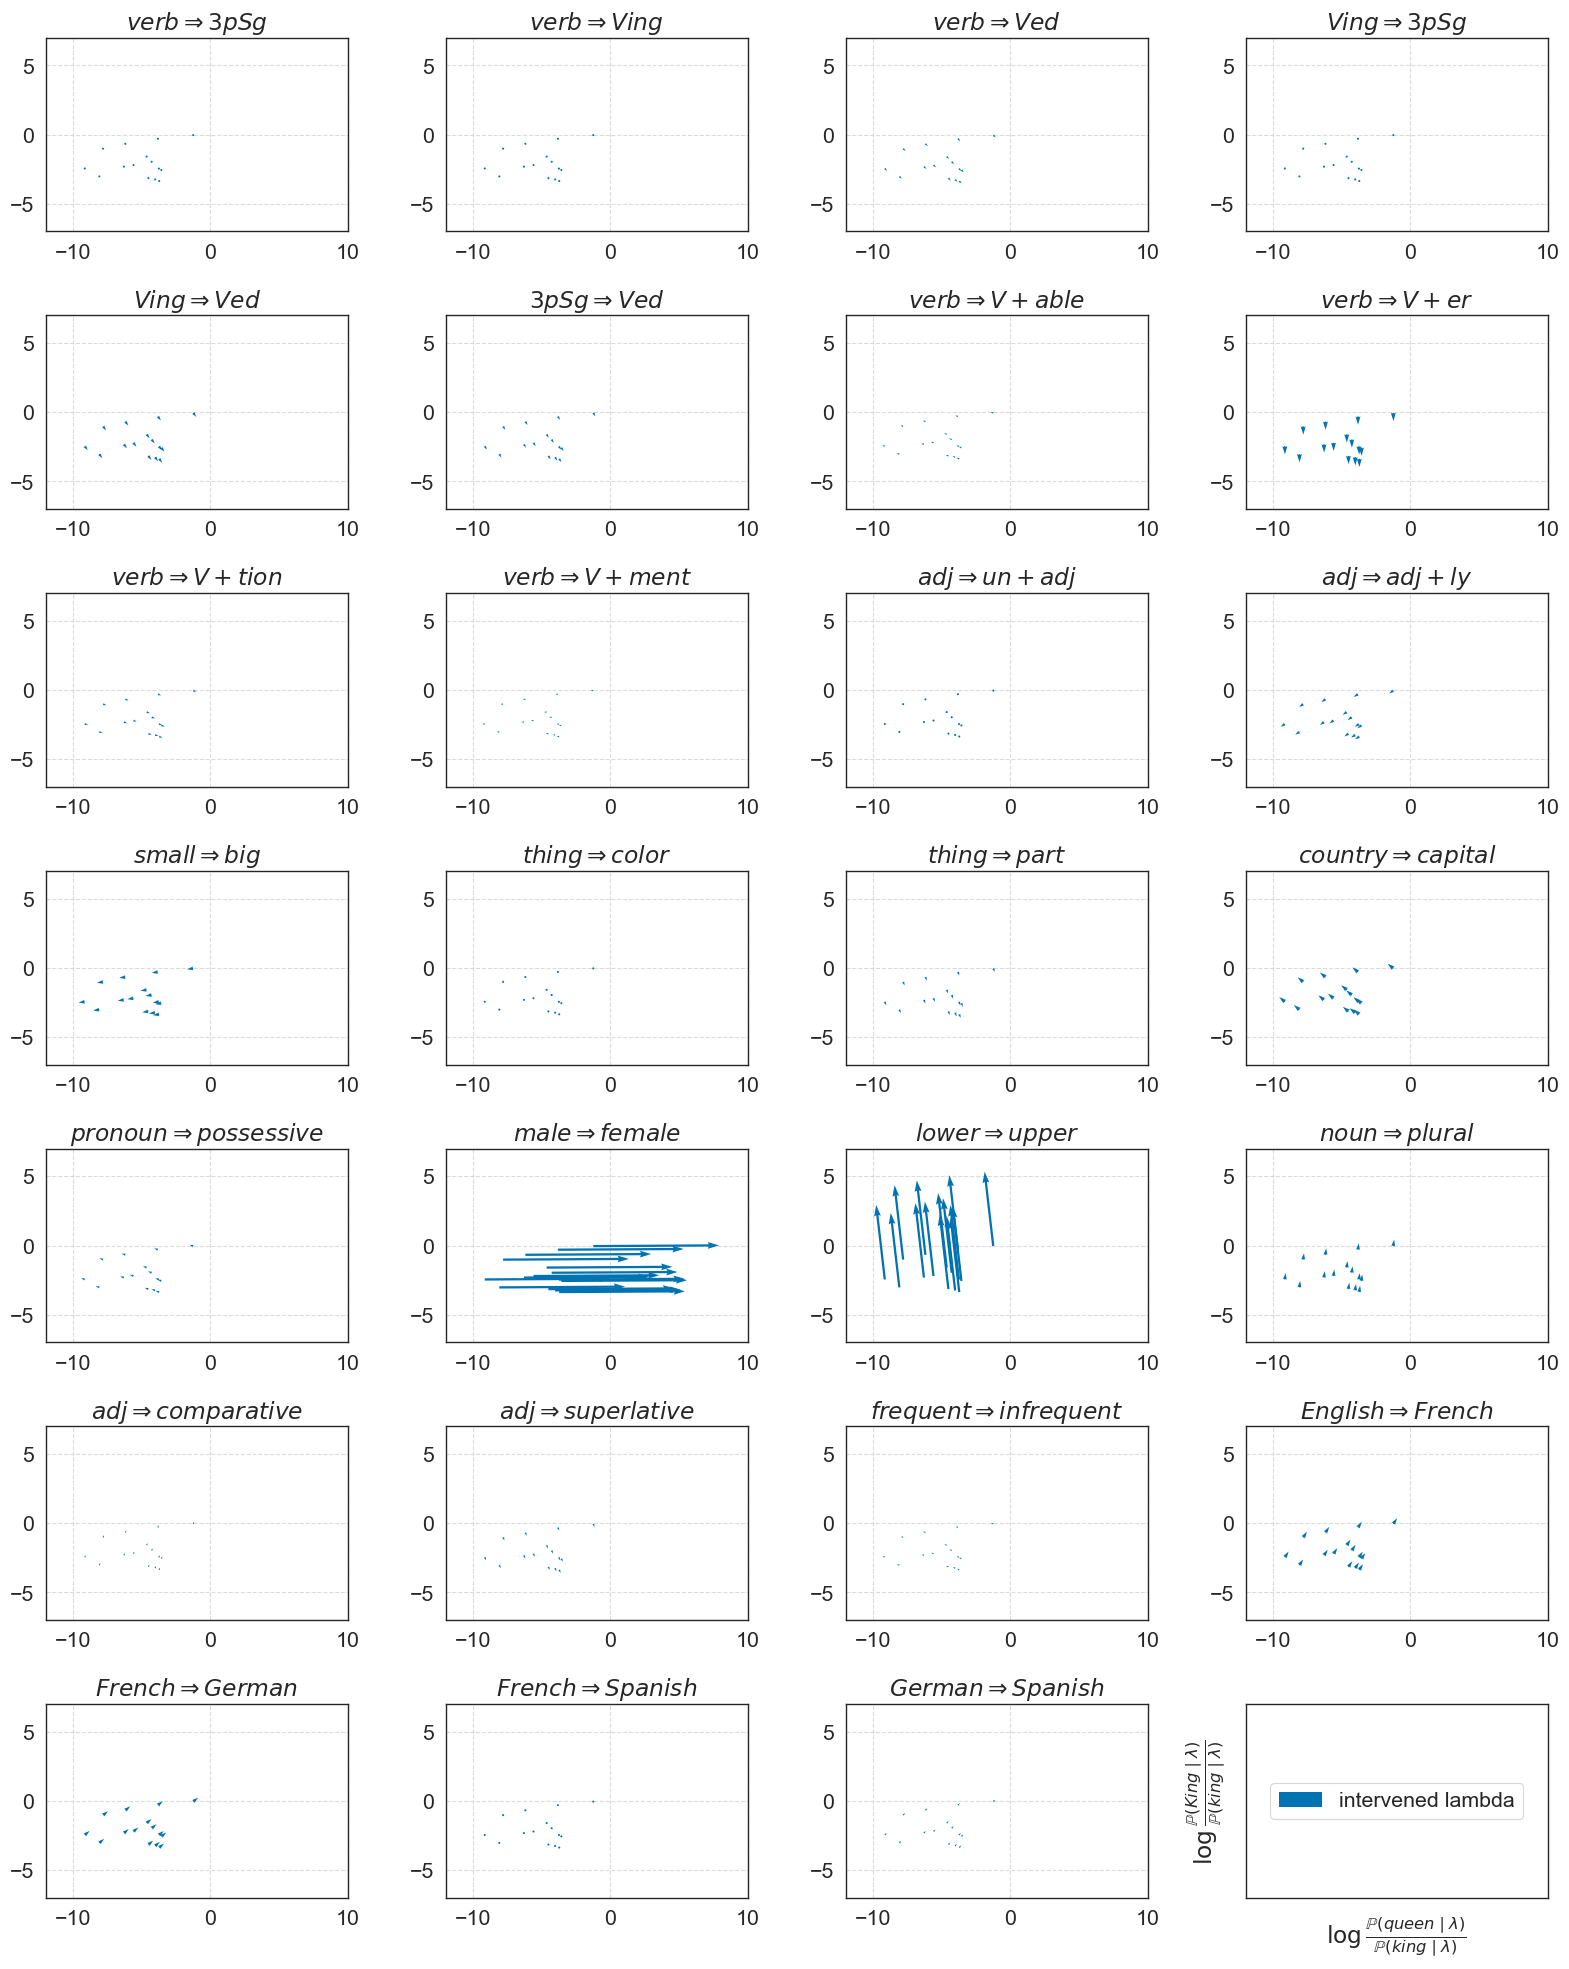

In [7]:
lrg.show_intervention(
    l_batch, 
    g, 
    concept_g, 
    concept_names,
    base = "king", 
    W = "queen", 
    Z = "King",
    alpha = 0.4, 
    xlim =[-12, 10], 
    ylim =[-7, 7], 
    fig_name = "g"
)

In [8]:
# check rank of the words for the intervened lambda
lrg.show_rank(text_batch, l_batch, g, concept_g, which_ind = 0, concept_number = 17)

Prompt: Long live the
  &  0.0 & 0.1 & 0.2 & 0.3 & 0.4
1 & king & Queen & queen & queen & queen
2 & King & queen & Queen & Queen & Queen
3 & Queen & king &  & lady & lady
4 & queen & King & lady & woman & woman
5 &  &  & king & women & women


In [9]:
lrg.show_rank(text_batch, l_batch, g, concept_g, which_ind = 5, concept_number = 17)

Prompt: In a monarchy, the ruler is usually a
  &  0.0 & 0.1 & 0.2 & 0.3 & 0.4
1 & king & king & her & woman & woman
2 & monarch & monarch & monarch & queen & queen
3 & member & her & member & her & female
4 & her & member & woman & monarch & her
5 & person & person & queen & member & member
